In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

### EDA

In [3]:
df = pd.read_csv("tested.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
df.info()

# Pclass: hạng vé (hạng 1 giàu,...)
# SibSp: số lượng ace rột, vợ chồng đi trên tàu
# Parch: số lượng cha mẹ, con cái đi trên tàu
# Fare: giá vé
# Embarked: cảng lên tàu: Giá trị:

# C → Cherbourg

# Q → Queenstown

# S → Southampton

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


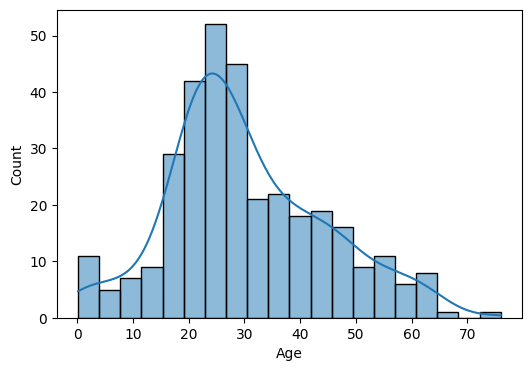

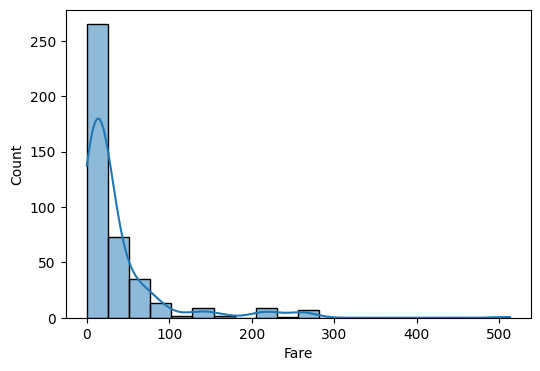

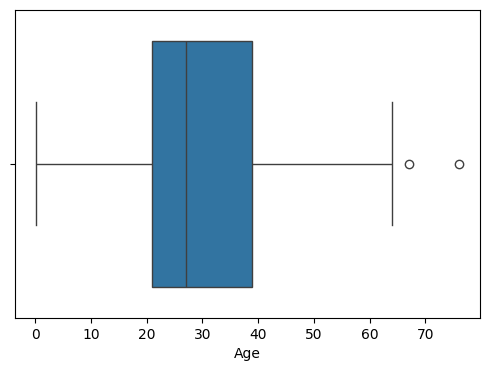

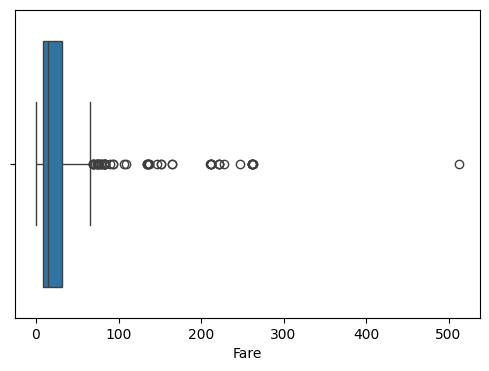

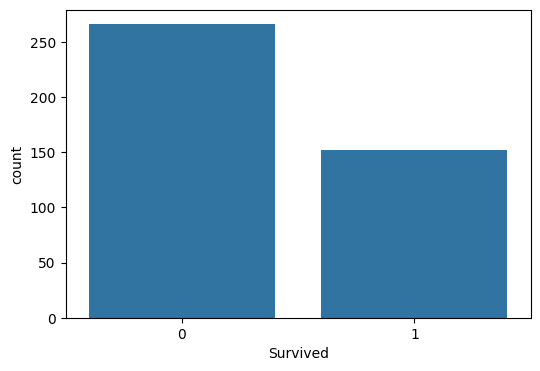

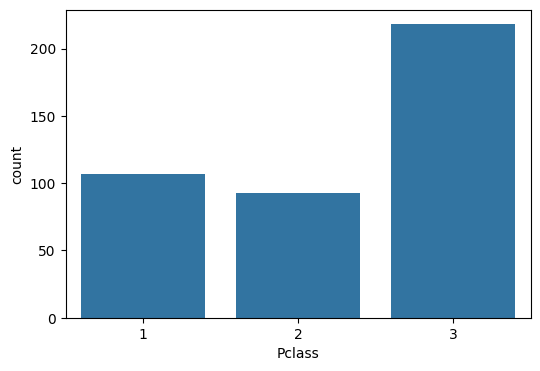

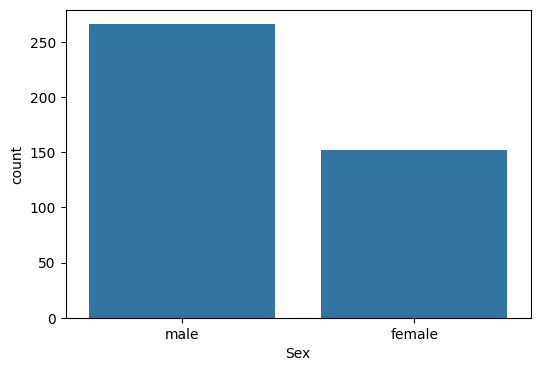

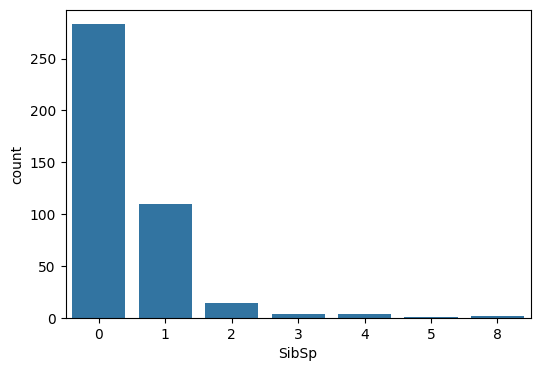

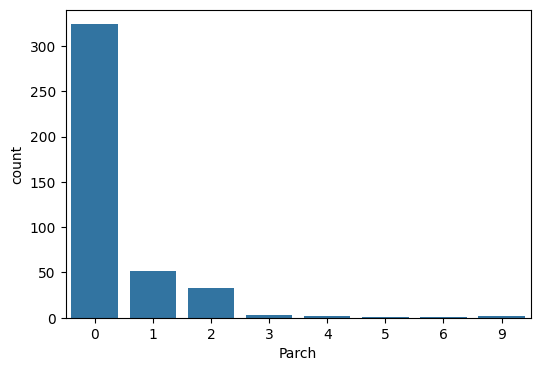

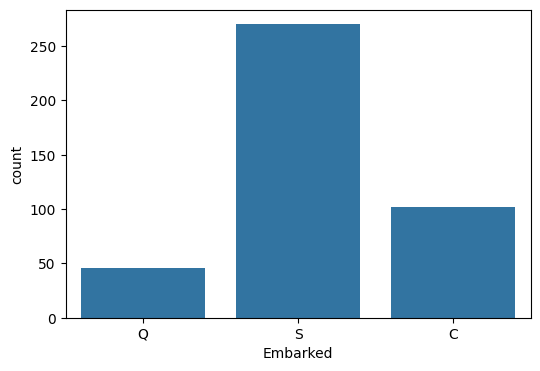

In [12]:
numberic_columns = ['Age', "Fare"]
categories_columns = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

for col in numberic_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df, x=col, kde=True, bins=20) # biểu đồ phân phối (biến só liên tục)


for col in numberic_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(df, x = col) # boxplot chỉ dùng cho dữ liệu số
    
for col in categories_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(df, x=col) # biểu đồ đếm số lượng giá trị rời rạc, phân loại (categorical)

<Axes: >

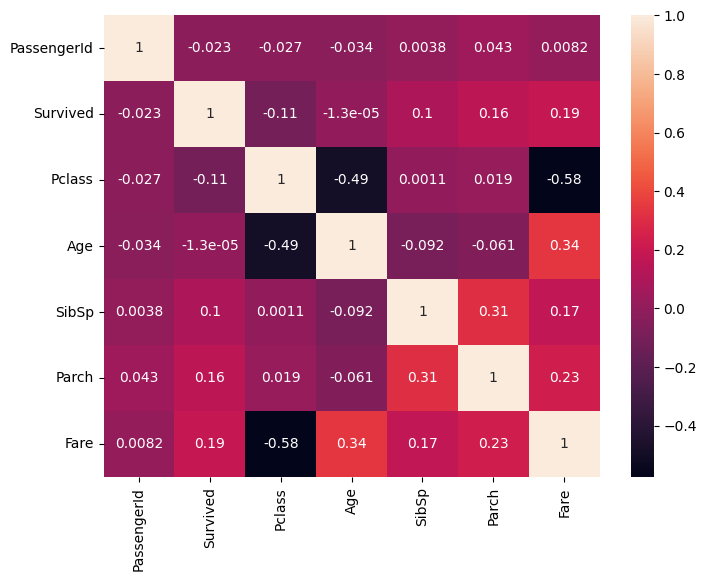

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True)

### Processing

In [47]:
df_cleaned = df.copy()
df_cleaned

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [48]:
df_cleaned = df_cleaned.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df_cleaned

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,8.0500,S
414,1,1,female,39.0,0,0,108.9000,C
415,0,3,male,38.5,0,0,7.2500,S
416,0,3,male,NaN,0,0,8.0500,S


In [49]:
df_cleaned.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [50]:
df_cleaned['Sex'] = df_cleaned['Sex'].map({
    'male': 0,
    'female': 1
})
df_cleaned

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34.5,0,0,7.8292,Q
1,1,3,1,47.0,1,0,7.0000,S
2,0,2,0,62.0,0,0,9.6875,Q
3,0,3,0,27.0,0,0,8.6625,S
4,1,3,1,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,0,3,0,NaN,0,0,8.0500,S
414,1,1,1,39.0,0,0,108.9000,C
415,0,3,0,38.5,0,0,7.2500,S
416,0,3,0,NaN,0,0,8.0500,S


In [51]:
df_cleaned = pd.get_dummies(df_cleaned, columns=['Embarked'], drop_first=True)
df_cleaned

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,34.5,0,0,7.8292,True,False
1,1,3,1,47.0,1,0,7.0000,False,True
2,0,2,0,62.0,0,0,9.6875,True,False
3,0,3,0,27.0,0,0,8.6625,False,True
4,1,3,1,22.0,1,1,12.2875,False,True
...,...,...,...,...,...,...,...,...,...
413,0,3,0,NaN,0,0,8.0500,False,True
414,1,1,1,39.0,0,0,108.9000,False,False
415,0,3,0,38.5,0,0,7.2500,False,True
416,0,3,0,NaN,0,0,8.0500,False,True


In [52]:
df_cleaned

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,34.5,0,0,7.8292,True,False
1,1,3,1,47.0,1,0,7.0000,False,True
2,0,2,0,62.0,0,0,9.6875,True,False
3,0,3,0,27.0,0,0,8.6625,False,True
4,1,3,1,22.0,1,1,12.2875,False,True
...,...,...,...,...,...,...,...,...,...
413,0,3,0,NaN,0,0,8.0500,False,True
414,1,1,1,39.0,0,0,108.9000,False,False
415,0,3,0,38.5,0,0,7.2500,False,True
416,0,3,0,NaN,0,0,8.0500,False,True
